By Grpup - 3 <br>
Pranav Pulkundwar <br>
Mugdha Parbat
# 1. Introduction


## Data Set Problems
This dataset contains information about diagnosis of heart disease patients. We first perform the data exploration to understand the data dependancies.
After that we use Machine learning models in order **to determine whether a person has heart disease or not**.

---

## Notebook Contains
*   Data exploration using libraries.(Section - 4)
*   Building ML models that can predict whether patients has heart disease or not. (Section - 5, 6)

**The machine learning models used in this project are:** 
1. K-Nearest Neighbour (KNN)
2. Support Vector Machine (SVM)
3. Naive Bayes
4. Decision Tree
5. Random Forest

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os

# 3. Importing Data Set

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 4. Dataset Exploration

Exploring the dataset that has been imorted.

## 4.1 Target Distribution

In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

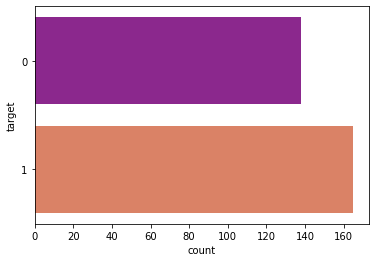

In [4]:
sns.countplot(y = "target", data = df, palette = 'plasma')
plt.show()

In [5]:
count_no_sick = len(df[df.target == 0])

count_sick = len(df[df.target == 1])

print("Percentage of patients without Heart disease: {}%".format((count_no_sick / (len(df.target))*100)))

print("Percentage of patients with Heart disease: {}%".format((count_sick / (len(df.target))*100)))

Percentage of patients without Heart disease: 45.54455445544555%
Percentage of patients with Heart disease: 54.45544554455446%


The above results tell us number of patients that have heart disease are higher than healthy patients.


## 4.2 Gender Distribution

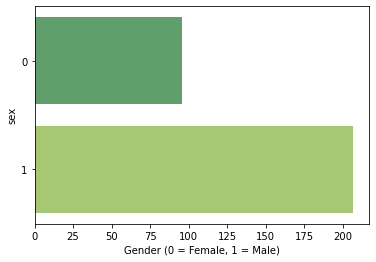

In [6]:
sns.countplot(y = 'sex', data = df, palette = 'summer')
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.show()

In [7]:
count_female = len(df[df.sex == 0])

count_male = len(df[df.sex == 1])

print("Percentage of Female: {}%".format((count_female / (len(df.sex))*100)))

print("Percentage of Male: {}%".format((count_male / (len(df.sex))*100)))

Percentage of Female: 31.683168316831683%
Percentage of Male: 68.31683168316832%


Male patients are more prone to heart disease than female patients.

## 4.3 Variation of age for each target class

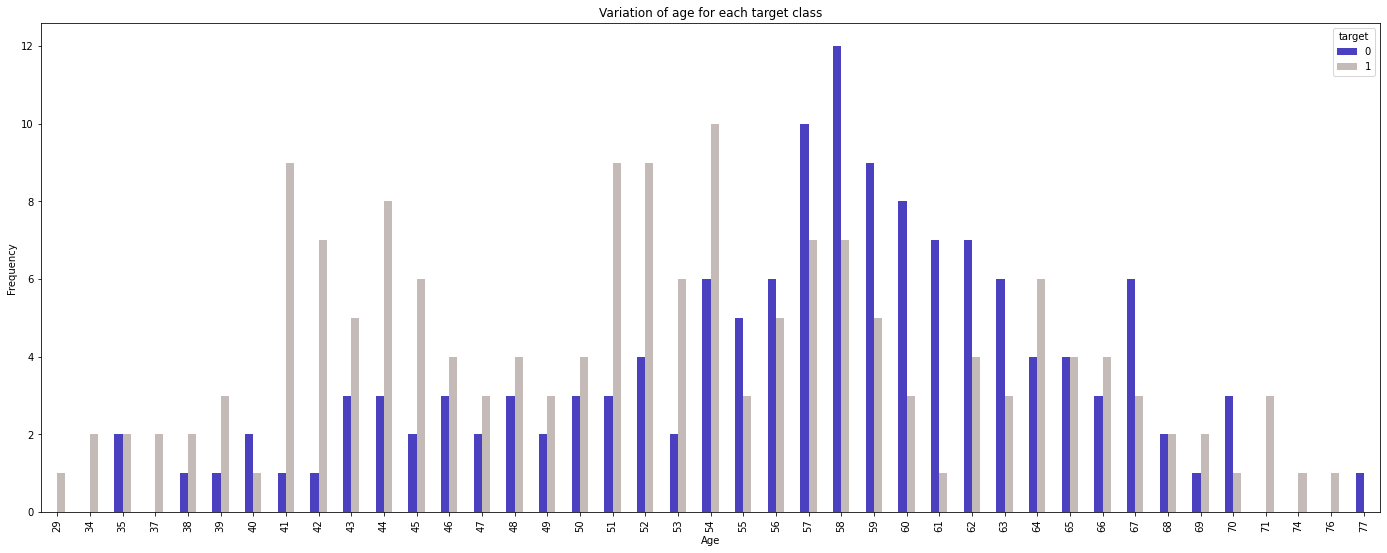

In [8]:
pd.crosstab(df.age,df.target).plot(kind = "bar", figsize = (24,9), color = ['#4B40C0','#C4BBB8' ])

plt.title('Variation of age for each target class')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Patients who have the most heart disease are in the age range of 41 to 54 years. <br>
While patients who do not have heart disease are mostly in the age range of 54 to 64 years.

## 4.4 Heart Disease Frequency based on Gender

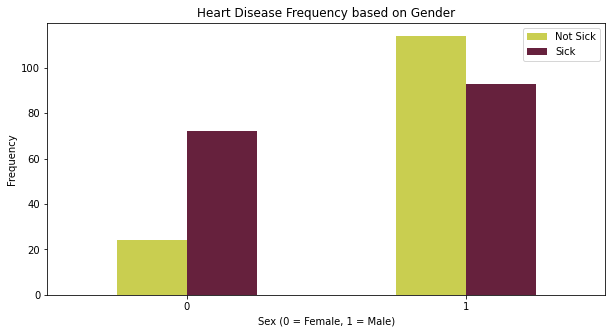

In [9]:
pd.crosstab(df.sex,df.target).plot(kind = "bar", figsize = (10,5), color = ['#C9CE50', '#66213D'])

plt.title('Heart Disease Frequency based on Gender')

plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation = 0)

plt.legend(["Not Sick", "Sick"])
plt.ylabel('Frequency')

plt.show()

We observe that heart disease is dominant in women. <br>
Meanwhile, lower number of men have heart disease.

## 4.5 Scatter Plot based on Age

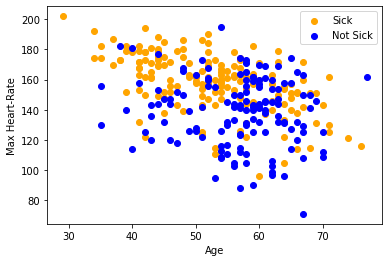

In [10]:
plt.scatter(x = df.age[df.target == 1], y = df.thalach[(df.target == 1)], c = "Orange")
plt.scatter(x = df.age[df.target == 0], y = df.thalach[(df.target == 0)], c = "blue")

plt.legend(["Sick", "Not Sick"])
plt.xlabel("Age")
plt.ylabel("Max Heart-Rate")

plt.show()

## 4.6 Heart Disease Frequency According To FBS

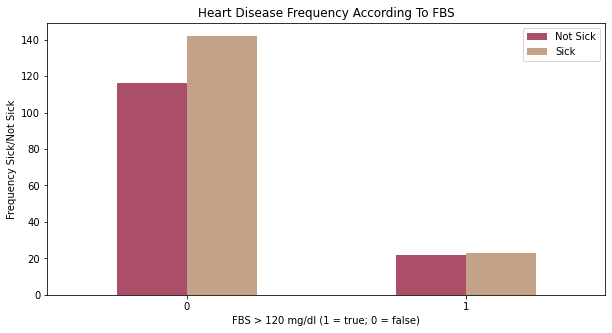

In [11]:
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (10,5), color = ['#AB4E68','#C4A287' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Not Sick", "Sick"])
plt.ylabel('Frequency Sick/Not Sick')
plt.show()

The number of patients who have / do not have heart disease is higher in those who do not do fasting blood sugar.

## 4.7 Heart Disease Frequency According To Chest Pain Type

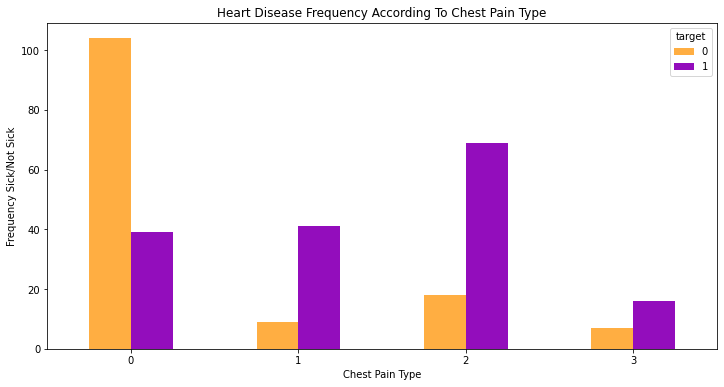

In [12]:
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (12,6), color = ['#FFAE42','#930DBC' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Sick/Not Sick')
plt.show()

Chest pain type level 0 has higher number of patients that don't have heart disease. <br>
While chest pain type level 2 has higher number of patients that have heart disease.

# 5. Dataset Preparation

## 5.1 Creating Dummy Variables

Transforming categorical variables using one-hot encoding technique. One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. This improves predictions and classification accuracy of our ML models.

In [13]:
cp = pd.get_dummies(df['cp'], prefix = "cp") #pd.get_dummies turns our data into binary vectors, 
#sklearn also has classes which an carry out one hot encoding but pd.get_dummies keeps the code precise
thal = pd.get_dummies(df['thal'], prefix = "thal")
slope = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


## 5.2 Dropping Unnecessary Variables

The variables that unnecessary will be deleted.

In [14]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# 6. Models

## 6.1 K-Nearest Neighbour (KNN)

In [15]:
y = df.target.values 
x_data = df.drop(['target'], axis = 1)


x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values #normalising data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)

print("{} NN Score: {}%".format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 77.04918032786885%


This classifier looks for the classes of K nearest neighbours of the given data point and based on the majority of class, it assigns a class to this data point.The number of neighbours can be varied. In this project, we varied them from 1 to 20 neighbours, and found out which scored the most. 

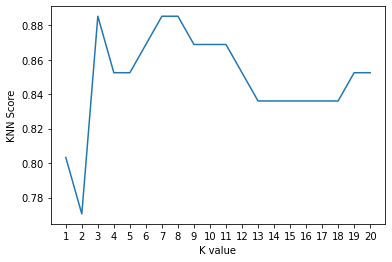

KNN Score Max 88.52459016393442%


In [17]:
score_list = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,21), score_list)

plt.xticks(np.arange(1,21,1))

plt.xlabel("K value")
plt.ylabel("KNN Score")

plt.show()

print("KNN Score Max {}%".format((max(score_list)) * 100))

Then, we plotted line graph of all the neighbours and the test score of each of the neighbours, to find which has the best maximum score. 

## 6.2 SVM

In [18]:
from sklearn.svm import SVC

svm = SVC(random_state = 5)
svm.fit(x_train.T, y_train.T)

SVC(random_state=5)

SVC forms hyperplanes/tubes which seperate classes as much as possible by adjusting the distance between the data points and the hyperplane. There are kernels which decide the hyperplane, in this project we tried the following:-
linear, poly, rbf, sigmoid

In [19]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train.T, y_train.T)
    svc_scores.append(svc_classifier.score(x_test.T,y_test.T))

In [26]:
svc_scores

[0.8524590163934426, 0.819672131147541, 0.8852459016393442, 0.7868852459016393]

In [32]:
print("Test Accuracy of SVM: {}%".format(max(svc_scores)*100))

Test Accuracy of SVM: 88.52459016393442%


Clearly 'rbf' performed the best for this dataset by acheiving the highest score of ~88.52%

## 6.3 Gaussian Naive Bayes

Gausian Naive Bayes is used when the data is continuous and assumed to have gaussian distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train.T, y_train.T)
print("Test Accuracy of Gaussian Naive Bayes: {}%".format(gnb.score(x_test.T,y_test.T) * 100))

## 6.4 Decision Tree

Decision tree forms decision trees and it assigns the class values to each data point. We range the features from 1 to 30 (30 is the total number of features in the dataset after creating dummy variables). In this case, we can vary the maximum number of features to be considered while making the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train.T, y_train.T)

print("Accuracy of Decision Tree: {}%".format(dt.score(x_test.T, y_test.T) * 100))

In [ ]:
score_list_DT = []
for i in range(2,21):
    dt2 = DecisionTreeClassifier(max_leaf_nodes = i)
    dt2.fit(x_train.T, y_train.T)
    score_list_DT.append(dt2.score(x_test.T, y_test.T))
    
plt.plot(range(2,21), score_list_DT)

plt.xticks(np.arange(2,21,1))

plt.xlabel("Leaf")
plt.ylabel("Score")

plt.show()

print("Decision Tree Max Score: {}%".format((max(score_list_DT)) * 100))

## 6.5 Random Forest

Random forest is the next level of decision trees. It makes forests of trees where each tree is formed by a random selection of features from all the features. We varied the number of trees from 2 to 25. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train.T, y_train.T)

print("Random Forest Accuracy Score : {}%".format(rf.score(x_test.T,y_test.T)*100))

In [ ]:
score_list_RF = []
for i in range(2,25):
    rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 2, max_leaf_nodes = i)
    rf2.fit(x_train.T, y_train.T)
    score_list_RF.append(rf2.score(x_test.T, y_test.T))
    
plt.plot(range(2,25), score_list_RF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print("RF Score Max {}%".format((max(score_list_RF)) * 100))

# 7. Model Comparison

from the scores below, we can see that the random forest model worked the best with an accuracy of 90.16%.

In [ ]:
compare_models = pd.DataFrame({'Model': ["KNN", "SVM", "Gaussian NB", "Decision Tree", "Random Forest"], 
                        'Accuracy': [86.89, 88.52, 88.52, 86.89, 90.16]})
compare_models.sort_values(by='Accuracy', ascending=False)

In [ ]:
models = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting"]
accuracy = [86.89, 88.52, 88.52, 86.89, 85.25, 90.16, 85.25]
colors = ["#FFAE42", "#4B40C0", "#AB4E68", "#C4A287","#170F11","#C4BBB8", "#930DBC"]

sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = models, y = accuracy, palette = colors)
plt.show()